In [1]:
import pandas as pd
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
data = titanic_data[['Survived','Pclass','Sex','Age','Fare','Cabin']]

In [3]:
categorical_columns = []
numerical_columns = []

for column in data.columns:
    if data[column].dtype == 'object' or column == 'Survived':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [4]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
Cabin        True
dtype: bool

In [5]:
data.fillna(0,inplace=True)

<ipython-input-5-964390382314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0,inplace=True)


In [6]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Cabin       False
dtype: bool

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def outlier(str,column):
  plt.figure(figsize=(8,6))
  sns.boxplot(data[column])
  plt.show()


Before Removing Outliers


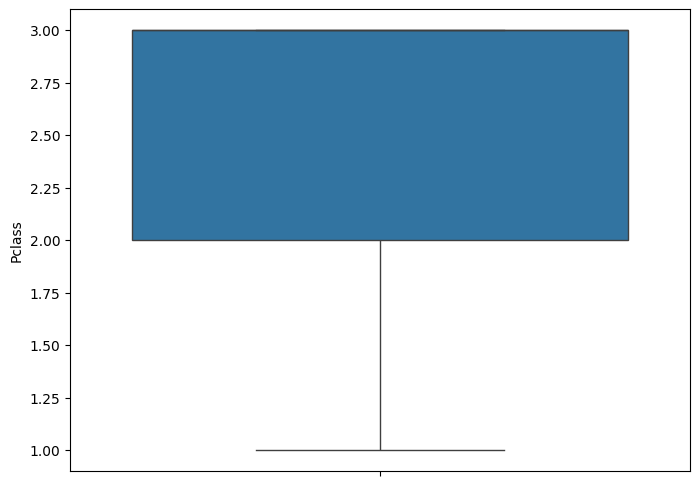

After Removing Outliers


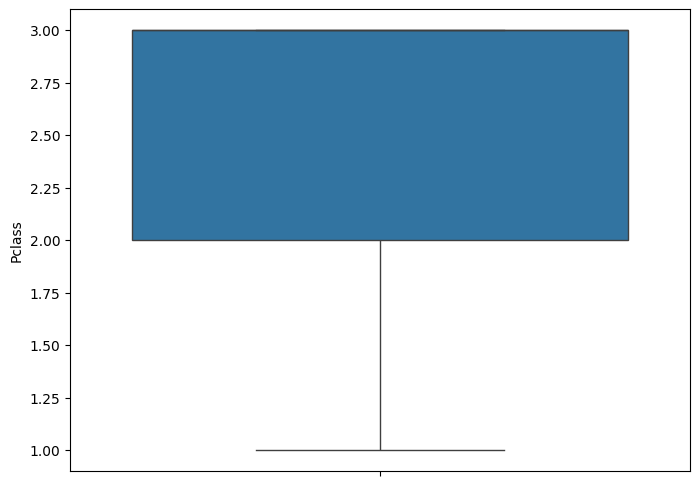

Before Removing Outliers


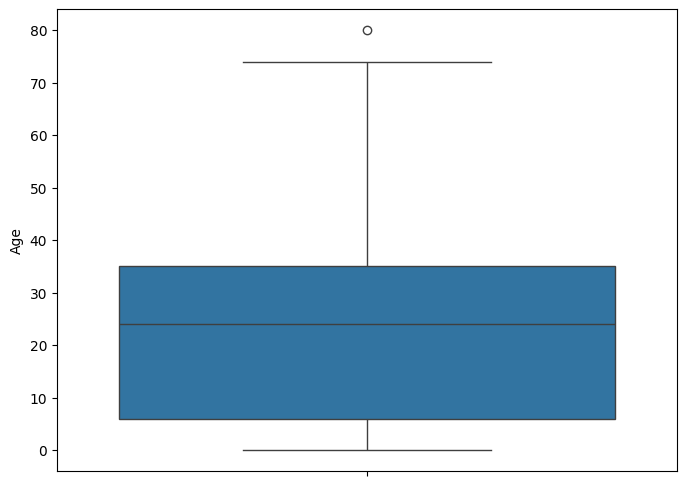

After Removing Outliers


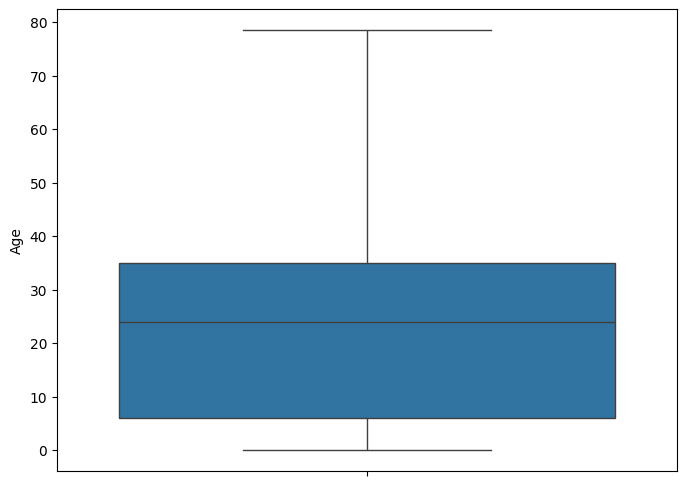

Before Removing Outliers


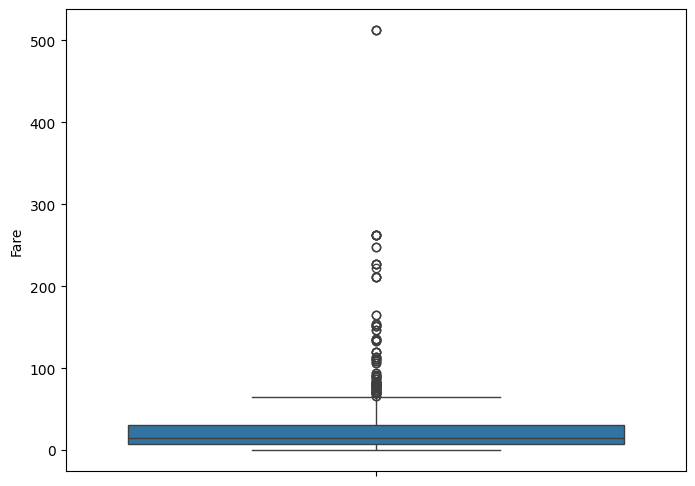

After Removing Outliers


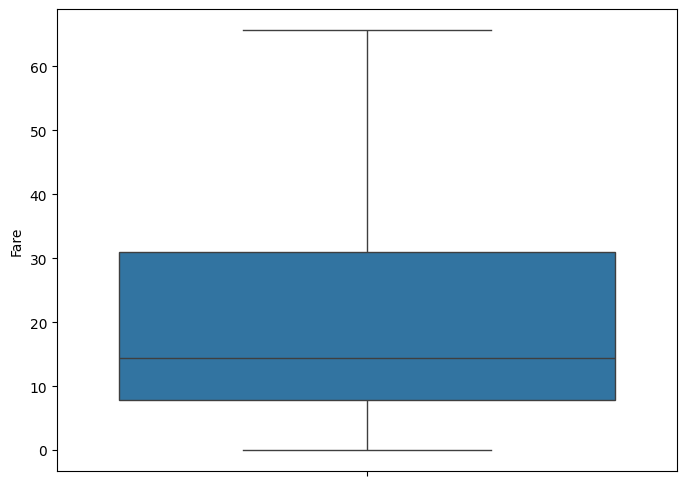

In [9]:
for column in numerical_columns:
  print("Before Removing Outliers")

  outlier('Before Outlier',column)

  print("After Removing Outliers")

  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3-q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  data.loc[(data[column] < lb),column] = lb
  data.loc[(data[column] > ub),column] = ub

  outlier('After Outlier',column)

In [10]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['0-12', '13-18', '19-35', '36-60', '61-80']

data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_group_survival = data[data['Survived'] == 1]['Age Group'].value_counts().sort_index()

age_group_survival = age_group_survival.reindex(labels, fill_value=0)

age_group_survival = age_group_survival.fillna(0)

<ipython-input-10-f9a3972d2324>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


In [11]:
data['Survived'] = data['Survived'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    object  
 1   Pclass     891 non-null    float64 
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    float64 
 5   Cabin      891 non-null    object  
 6   Age Group  891 non-null    category
dtypes: category(1), float64(3), object(3)
memory usage: 43.0+ KB


<ipython-input-11-0eb1e3922811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(str)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [14]:
encoding= {}
encoder = LabelEncoder()

for column in categorical_columns:
  data[column] = data[column].astype(str)
  data[column] = encoder.fit_transform(data[column])
  encoding[column] = dict(zip(map(str.lower,encoder.classes_),encoder.transform(encoder.classes_)))
  print(f"{column} : {encoding[column]}")


Survived : {'0': 0, '1': 1}
Sex : {'female': 0, 'male': 1}
Cabin : {'0': 0, 'a10': 1, 'a14': 2, 'a16': 3, 'a19': 4, 'a20': 5, 'a23': 6, 'a24': 7, 'a26': 8, 'a31': 9, 'a32': 10, 'a34': 11, 'a36': 12, 'a5': 13, 'a6': 14, 'a7': 15, 'b101': 16, 'b102': 17, 'b18': 18, 'b19': 19, 'b20': 20, 'b22': 21, 'b28': 22, 'b3': 23, 'b30': 24, 'b35': 25, 'b37': 26, 'b38': 27, 'b39': 28, 'b4': 29, 'b41': 30, 'b42': 31, 'b49': 32, 'b5': 33, 'b50': 34, 'b51 b53 b55': 35, 'b57 b59 b63 b66': 36, 'b58 b60': 37, 'b69': 38, 'b71': 39, 'b73': 40, 'b77': 41, 'b78': 42, 'b79': 43, 'b80': 44, 'b82 b84': 45, 'b86': 46, 'b94': 47, 'b96 b98': 48, 'c101': 49, 'c103': 50, 'c104': 51, 'c106': 52, 'c110': 53, 'c111': 54, 'c118': 55, 'c123': 56, 'c124': 57, 'c125': 58, 'c126': 59, 'c128': 60, 'c148': 61, 'c2': 62, 'c22 c26': 63, 'c23 c25 c27': 64, 'c30': 65, 'c32': 66, 'c45': 67, 'c46': 68, 'c47': 69, 'c49': 70, 'c50': 71, 'c52': 72, 'c54': 73, 'c62 c64': 74, 'c65': 75, 'c68': 76, 'c7': 77, 'c70': 78, 'c78': 79, 'c82': 80

<ipython-input-14-fe06df1458c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(str)
<ipython-input-14-fe06df1458c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
<ipython-input-14-fe06df1458c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [15]:
def val(column,value):
  return encoding[column][value]

In [16]:
X = data.drop('Survived',axis=1).drop('Age Group',axis=1)
y = data['Survived']


In [17]:
scaler = StandardScaler()

In [18]:
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [21]:
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy : ", gb_accuracy)

Accuracy :  0.8268156424581006


In [22]:
name = input("Enter your Name : ").lower()
pclass = input("Enter your Pclass : ")
sex = input("Enter your Sex : ").lower()
age = input("Enter your Age : ")
fare = input("Enter your Fare : ")
cabin = input("Enter your Cabin : ").lower()

Enter your Name : Thomas
Enter your Pclass : 3
Enter your Sex : male
Enter your Age : 23
Enter your Fare : 8.25
Enter your Cabin : E46


In [23]:
sex = val('Sex',sex)
cabin = val('Cabin',cabin)


In [24]:
new_input = scaler.transform(pd.DataFrame([[pclass,sex,age,fare,cabin]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
new_pred = gb_model.predict(new_input)

In [26]:
if new_pred == 1:
  print(f"The Passenger {name} will Survive")
else:
  print(f"The Passenger {name} will Not Survive")

The Passenger thomas will Not Survive
